In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()

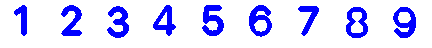

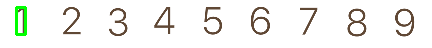

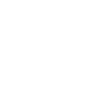

[{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}]

In [79]:
img = cv2.imread("/data/users/lic/dev/test/Sudoku/number.png")
blank_img = np.zeros(img.shape, dtype=np.uint8)
blank_img.fill(255)

ref = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ref = cv2.threshold(ref, 100, 255, cv2.THRESH_BINARY_INV)[1]

digits={}

refCnts, hierarchy = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #找到外轮廓
refCnts=sorted(refCnts,key=lambda x:x[0][0][0])
display(Image.fromarray(cv2.drawContours(blank_img,refCnts,-1,(0,0,255),3)))

x, y, w, h = cv2.boundingRect(refCnts[0])
display(Image.fromarray(cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)))

for (i, c) in enumerate(refCnts):
	(x, y, w, h) = cv2.boundingRect(c) #外接矩形
	roi = ref[y:y + h, x:x + w]
	digits[i+1] = roi
display(Image.fromarray(digits[8]))

imgs=[Image.new("RGB",[100,100],(255,255,255))]

display(imgs[0])

results=[]
for img in imgs:
    scores={}
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
    ref = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ref = cv2.threshold(ref, 100, 255, cv2.THRESH_BINARY_INV)[1]
    # refCnts, hierarchy = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #找到外轮廓
    # display(Image.fromarray(cv2.drawContours(blank_img,refCnts[0],-1,(0,0,255),3)))
    for num in digits:
        if len(refCnts)==0:
            scores[num] = 0
        else:
            (_, score, _, _) = cv2.minMaxLoc(cv2.matchTemplate(digits[num], ref,cv2.TM_CCOEFF))
            scores[num]=score

    results.append(scores)
results